<a href="https://colab.research.google.com/github/apurba1914/Machine-Learning-Lab/blob/main/Neural_Network_Lab_2_Roll_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Lab you will learn to build your own neural network classifier model. At first we will demonstrate how to build a network from scratch

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#import the "make moons" dataset from sklearn as sample dataset

from ??


#Plot the dataset



In [ ]:
from sklearn.datasets import make_moons

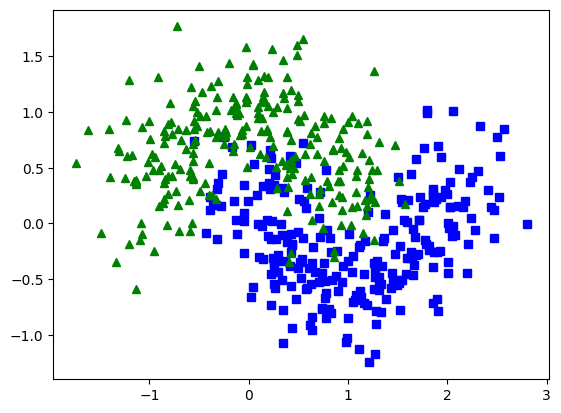

In [ ]:
# check the datasets shape
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")

In [ ]:
!pip install -U scikit-learn

In [ ]:
# split the dataset into 80% train and 20% test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(400, 2) (400,) (100, 2) (100,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Dense(12, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=250, batch_size=10)

Epoch 1/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7262 - loss: 0.6257
Epoch 2/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7718 - loss: 0.5731
Epoch 3/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8368 - loss: 0.5280
Epoch 4/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8568 - loss: 0.4847
Epoch 5/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8343 - loss: 0.4553
Epoch 6/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8371 - loss: 0.4221
Epoch 7/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8456 - loss: 0.4041
Epoch 8/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8273 - loss: 0.4122
Epoch 9/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8054 - loss: 0.4162
Epoch 10/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8505 - loss: 0.3522
Epoch 11/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8667 - loss: 0.3347
Epoch 12/250
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy:

In [ ]:
_,accuracy = model.evaluate(x_test, y_test)
print('The Accuracy score on the Test set is: %.2f' % (accuracy*100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8779 - loss: 0.3148  
The Accuracy score on the Test set is: 89.00


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


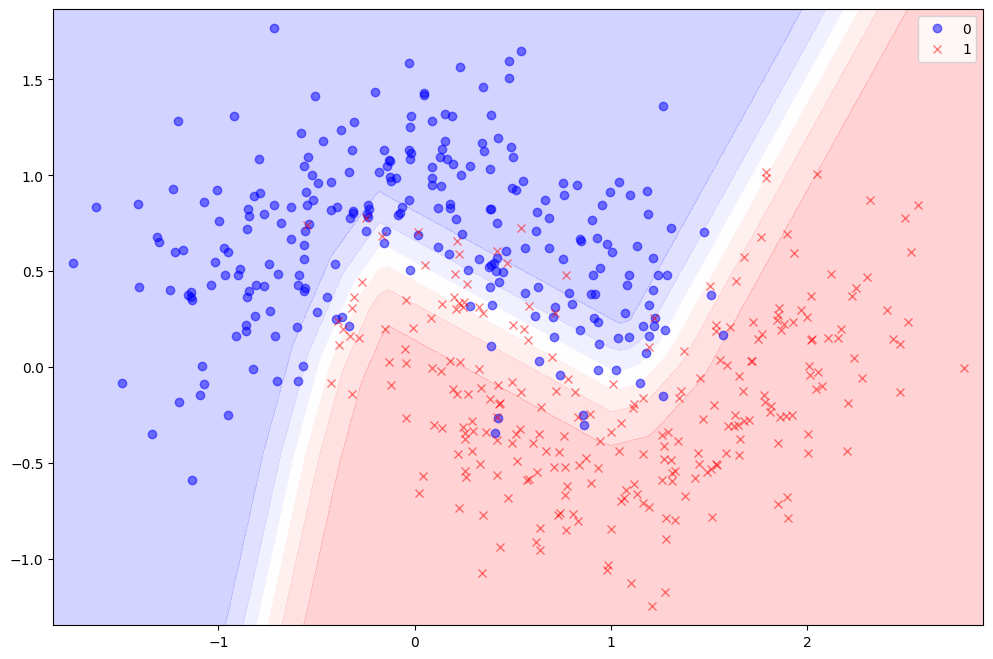

In [ ]:
#Plot decision boundary

def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)

    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])

plot_decision_boundary(model, X, y)

### Deep model : As the dataset cannot be classified accurately by a linear classifier, we need a non-linear model. For that we need to develop a deeper network

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=40)

Epoch 1/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5921 - loss: 0.6808
Epoch 2/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8245 - loss: 0.5783 
Epoch 3/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8509 - loss: 0.4346 
Epoch 4/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8440 - loss: 0.3400 
Epoch 5/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8410 - loss: 0.3316 
Epoch 6/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8563 - loss: 0.3134 
Epoch 7/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8882 - loss: 0.2605
Epoch 8/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8521 - loss: 0.3156  
Epoch 9/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8548 - loss: 0.2955
Epoch 10/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8777 - loss: 0.2833 
Epoch 11/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8555 - loss: 0.3112 
Epoch 12/40
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.

In [ ]:
print(x_test.shape, y_test.shape)

(100, 2) (100,)


In [ ]:
_,accuracy = model.evaluate(x_test, y_test)
print('The Accuracy score on the Test set is: %.2f' % (accuracy*100))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8933 - loss: 0.3003  
The Accuracy score on the Test set is: 90.00


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Import the necessary library and objects from sklearn and print the confusion matrix

In [ ]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [ ]:
y_pred_class=[]
for i in y_pred:
  if i>0.9:
    y_pred_class.append(1)
  else:
    y_pred_class.append(0)

In [ ]:
conf=confusion_matrix(y_pred_class, y_test)

<Axes: >

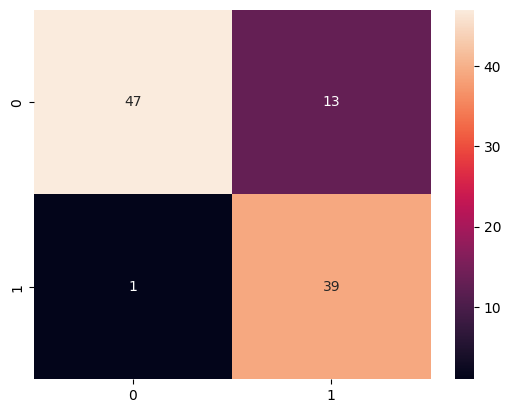

In [ ]:
import seaborn as sns
sns.heatmap(conf, annot=True)

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


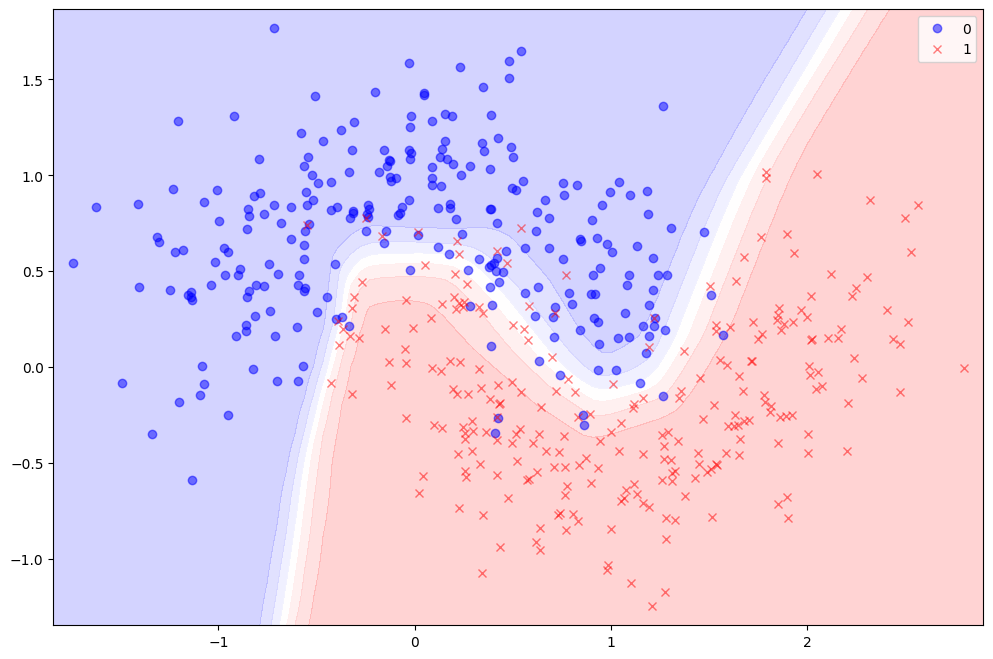

In [ ]:
#Plot decision boundary

def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)

    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]

    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])

plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [ ]:
import pandas as pd
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report


df = datasets.load_iris()

In [ ]:
X = df.data
y = df.target

In [ ]:
iris_df = pd.DataFrame(X, columns=df.feature_names)
iris_df['species'] = y

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

In [ ]:
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=50)

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6918 - loss: 1.0050
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7044 - loss: 0.9169 
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6523 - loss: 0.8790 
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6697 - loss: 0.7999 
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6794 - loss: 0.7400 
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6996 - loss: 0.6964 
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7490 - loss: 0.6445 
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8530 - loss: 0.5631 
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8500 - loss: 0.5197 
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9103 - loss: 0.4783 
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9374 - loss: 0.4137 
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9320 - loss: 0.4007 
Ep

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [ ]:
y_true = y_test

In [ ]:
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=df.target_names))

Accuracy: 0.7666666666666667
Classification Report:
               precision    recall  f1-score   support

      setosa       0.77      1.00      0.87        10
  versicolor       0.75      0.33      0.46         9
   virginica       0.77      0.91      0.83        11

    accuracy                           0.77        30
   macro avg       0.76      0.75      0.72        30
weighted avg       0.76      0.77      0.73        30



In [ ]:
#print the confusion matrix
conf=confusion_matrix(y_pred, y_test)

<Axes: >

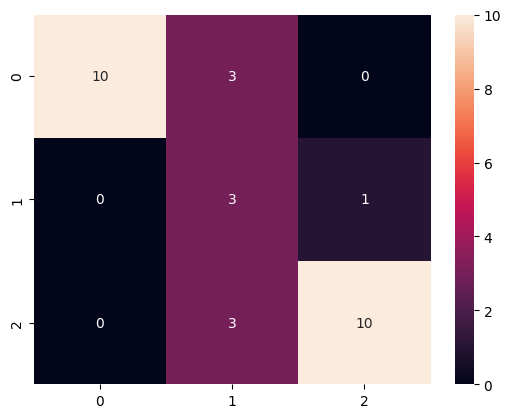

In [ ]:
import seaborn as sns
sns.heatmap(conf, annot=True)

## Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
print(df.head())
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

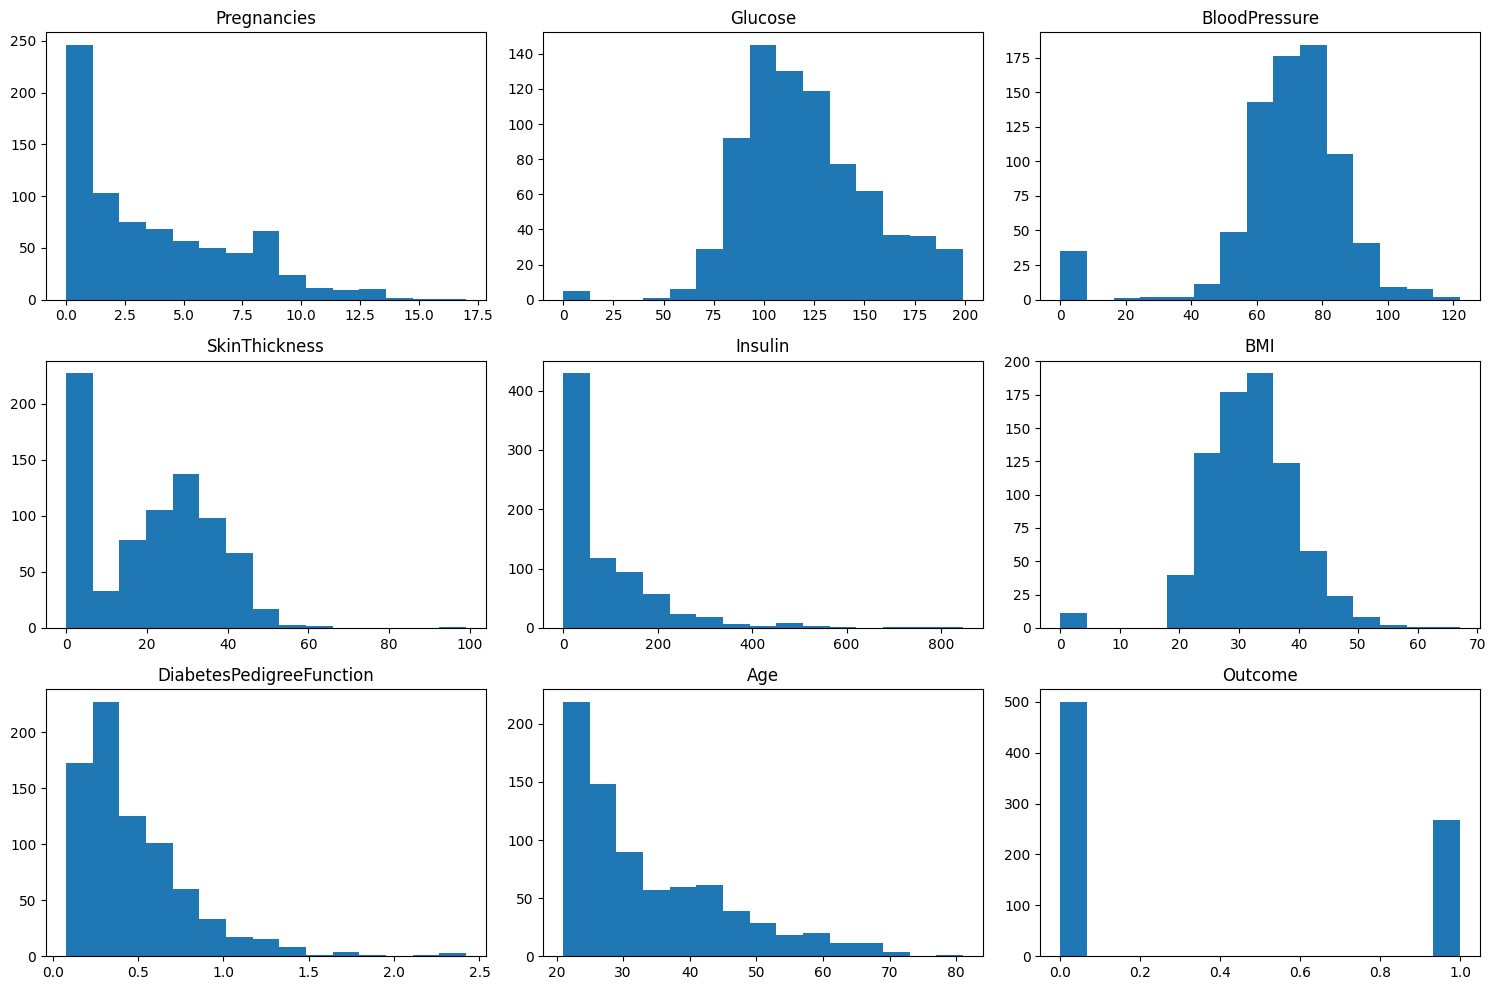

In [ ]:
df.hist(bins=15, figsize=(15, 10), grid=False)
plt.tight_layout()
plt.show()

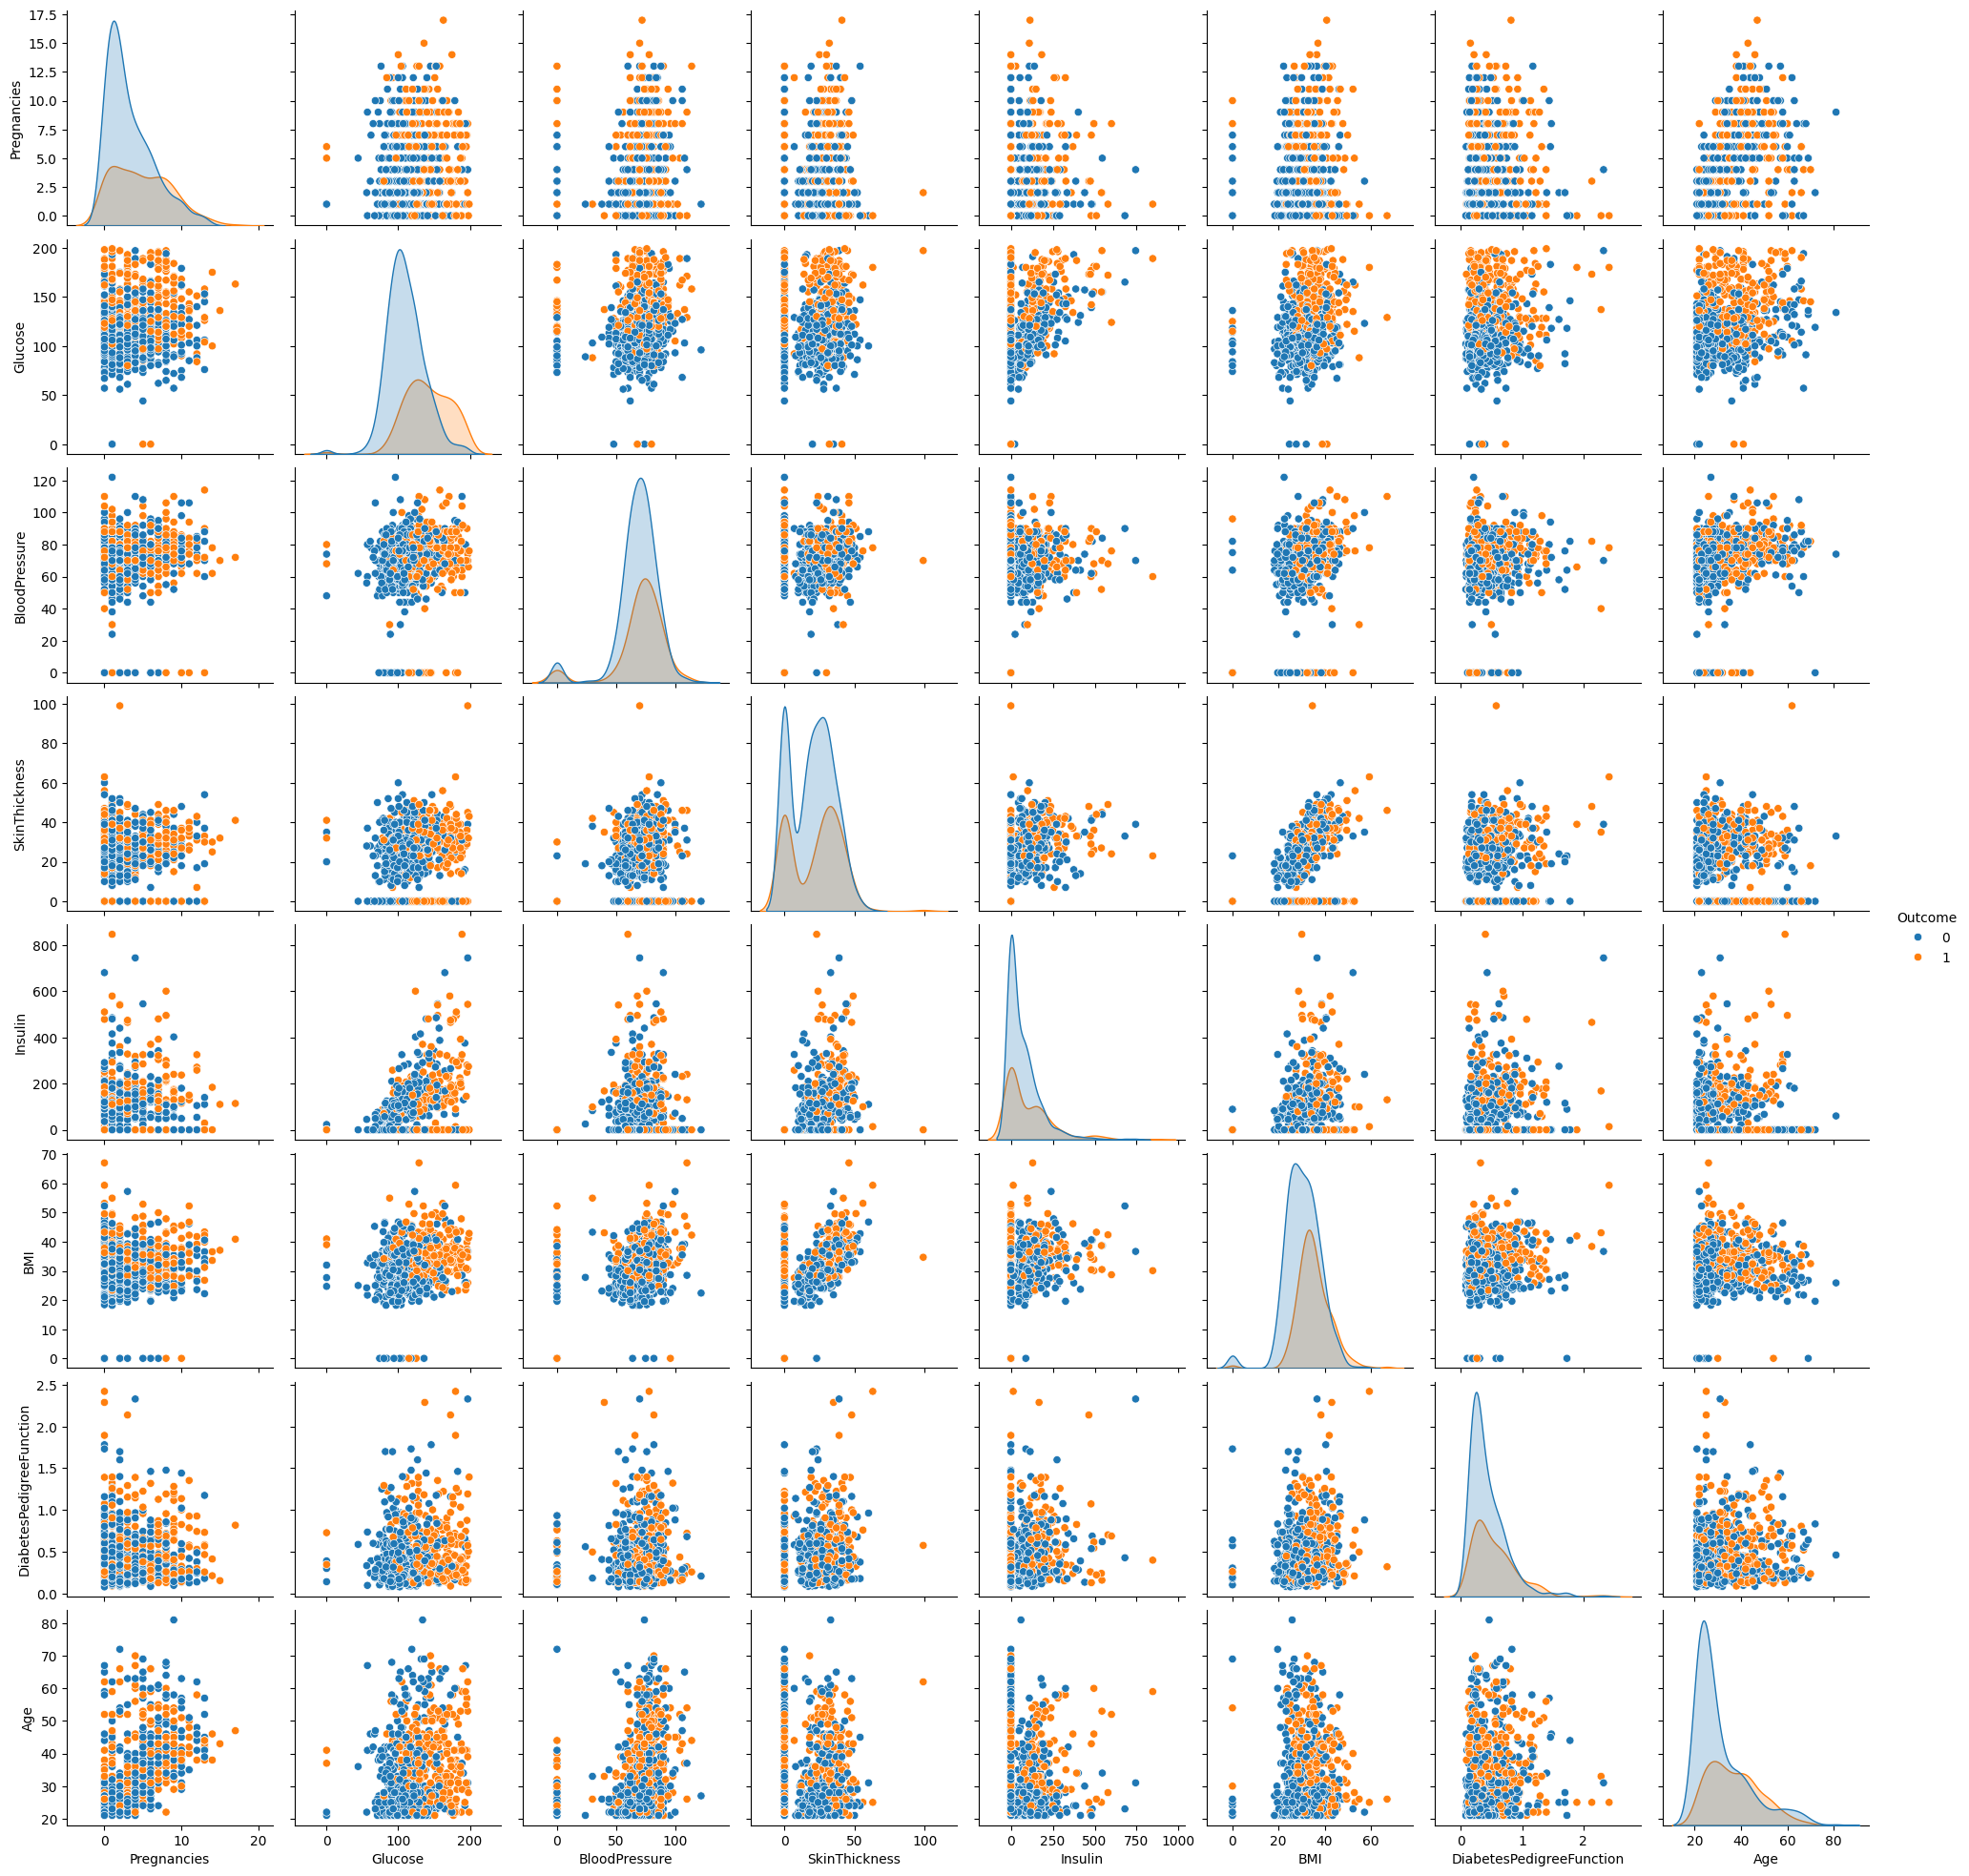

In [ ]:
sns.pairplot(df, hue='Outcome')
plt.show()

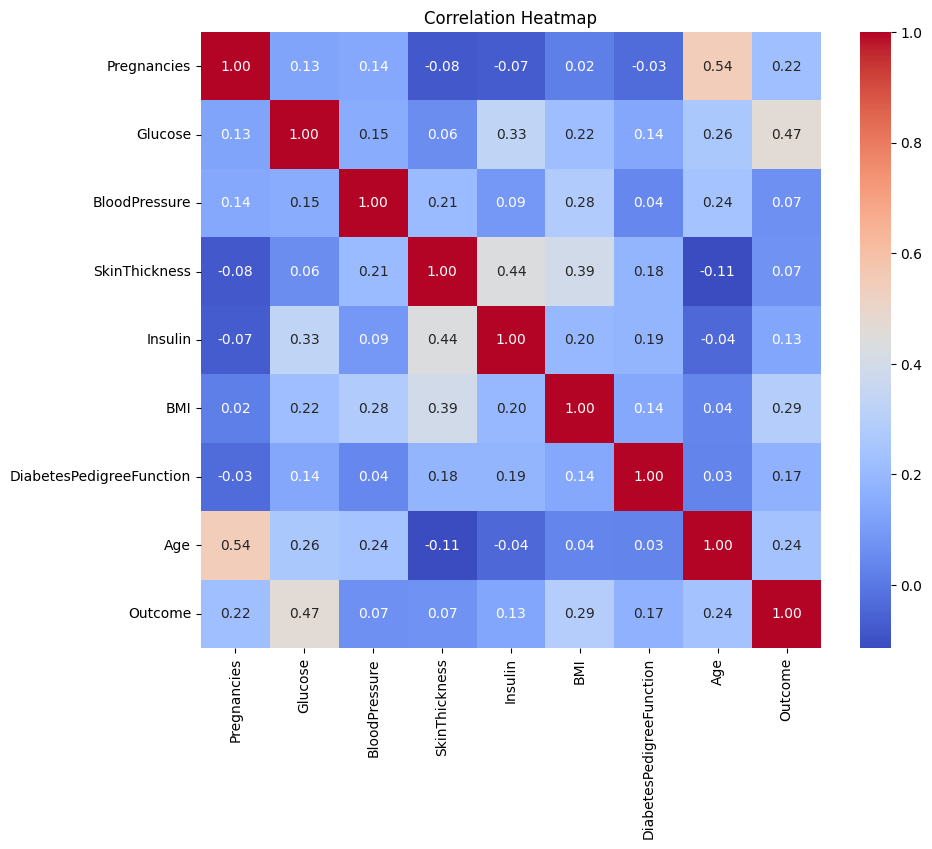

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df.drop('Outcome', axis=1))

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# **Answer:** Standardization can improve performance where the features have widely differing ranges. This dataset has wide varying feature ranges.Therefore standardization is required. Here MinMax scaling is chosen as it suits the varied distribution of features.

## Exercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=22)


In [ ]:
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.1, verbose=1)

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6159 - loss: 0.6831 - val_accuracy: 0.6613 - val_loss: 0.6497
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6682 - loss: 0.6399 - val_accuracy: 0.6935 - val_loss: 0.6145
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6805 - loss: 0.5929 - val_accuracy: 0.7258 - val_loss: 0.5731
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6935 - loss: 0.5731 - val_accuracy: 0.7581 - val_loss: 0.5402
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7499 - loss: 0.5222 - val_accuracy: 0.7903 - val_loss: 0.4989
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7770 - loss: 0.4996 - val_accuracy: 0.7742 - val_loss: 0.5111
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7586 - loss: 0.5112 - val_accuracy: 0.7903 - val_loss: 0.4849
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7980 - loss: 0.4667 - val_accuracy: 0.7903 - v

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7532467532467533


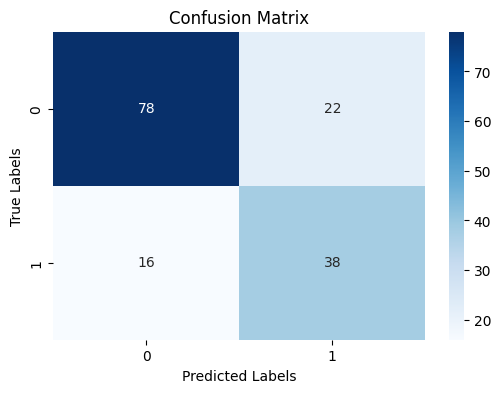

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       100
           1       0.63      0.70      0.67        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154



## Exercise 3
Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

# **NO NOTEBOOK IS FOUND TO COMPARE**

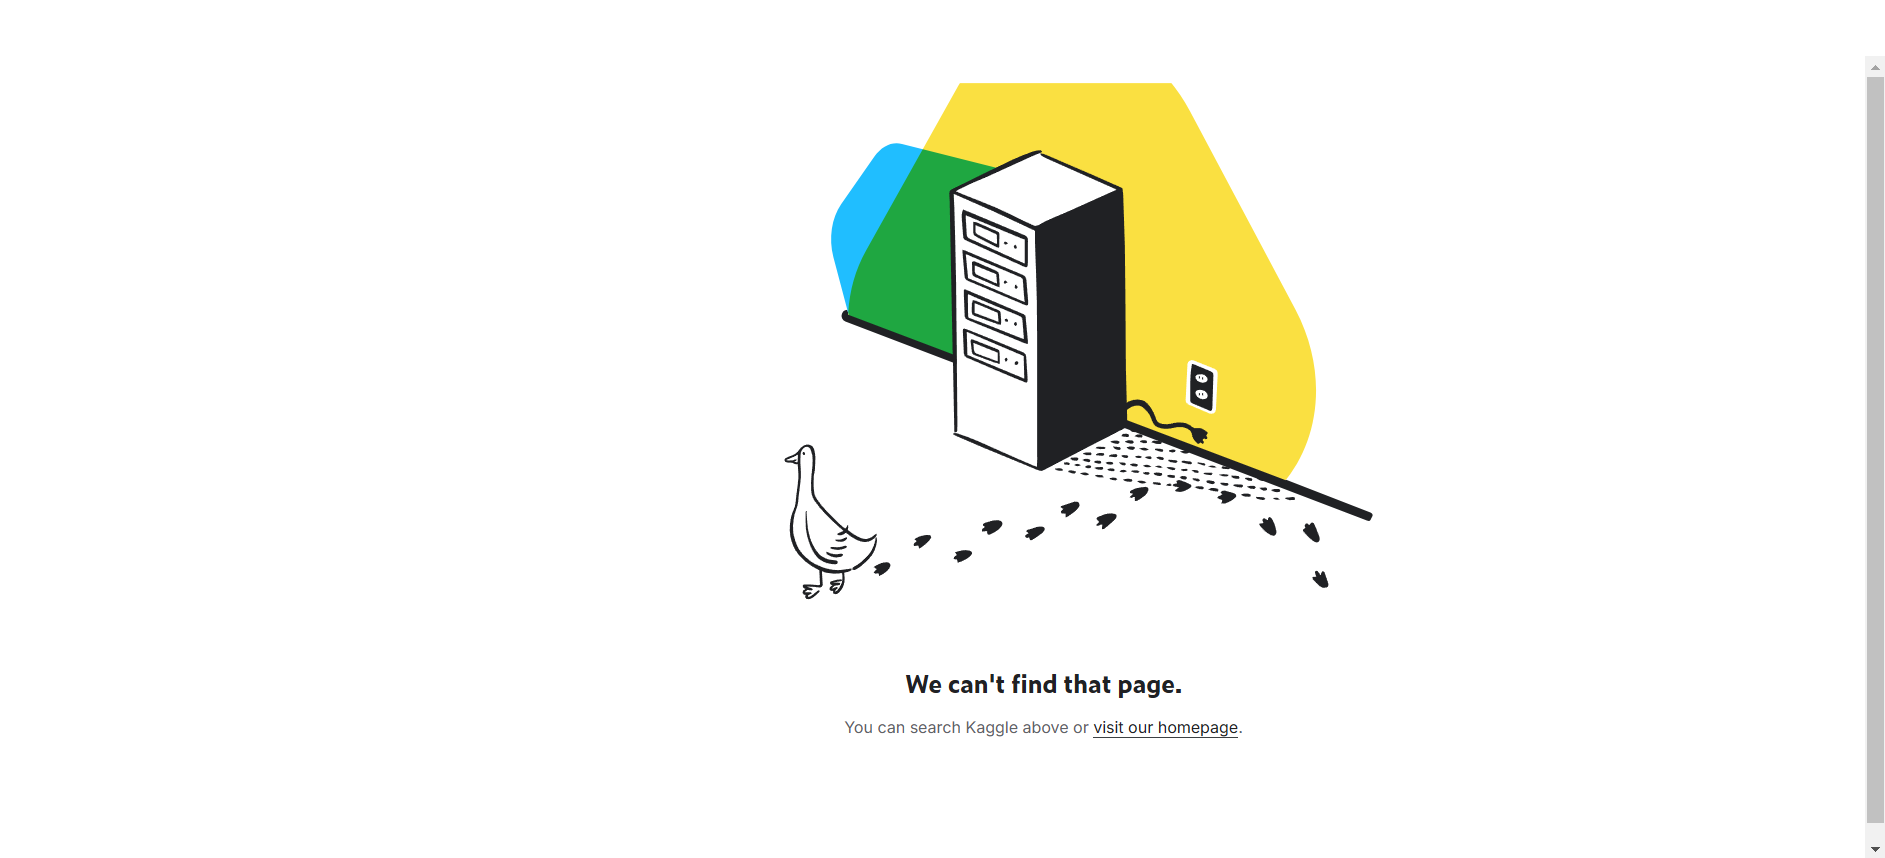